<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from google.colab.patches import cv2_imshow
from skimage import io
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

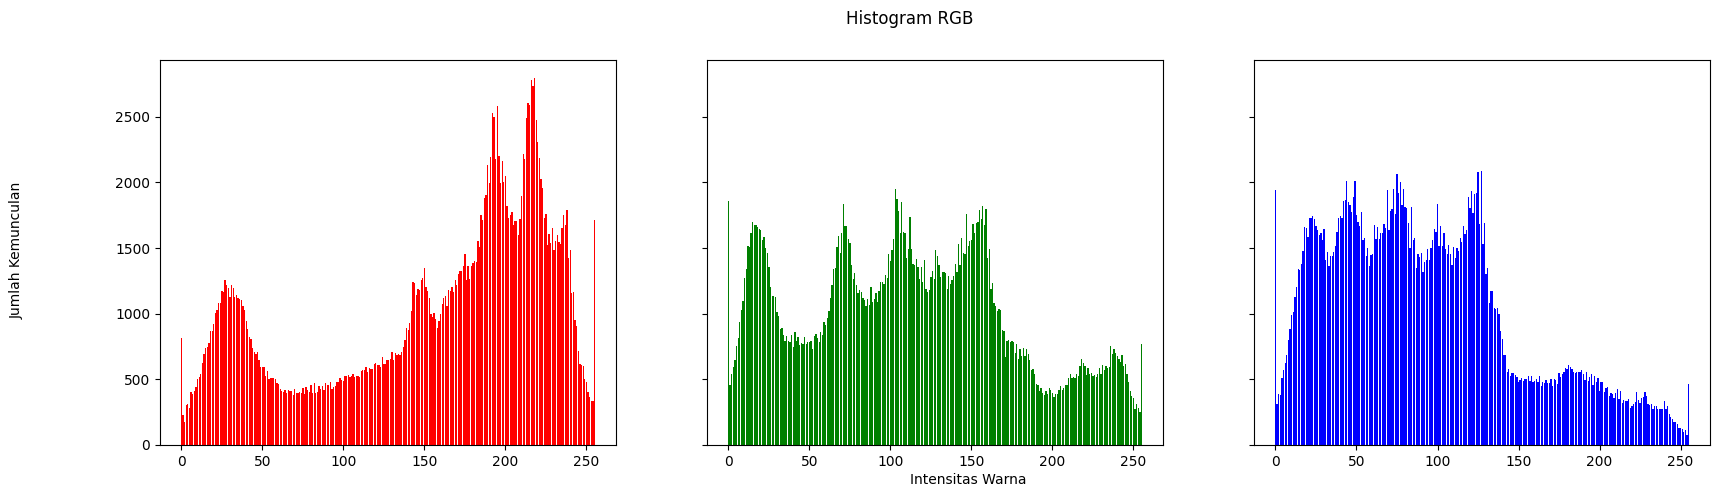

In [19]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

R = [0]*256
G = [0]*256
B = [0]*256

height, width, channel = img1.shape
for y in range (height):
  for x in range (width):
    R[img1[y][x][2]] += 1
    G[img1[y][x][1]] += 1
    B[img1[y][x][0]] += 1

intensitas = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', va='center')
axs[0].bar(intensitas, R, color='Red')
axs[1].bar(intensitas, G, color='Green')
axs[2].bar(intensitas, B, color='Blue')


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

<function matplotlib.pyplot.show(close=None, block=None)>

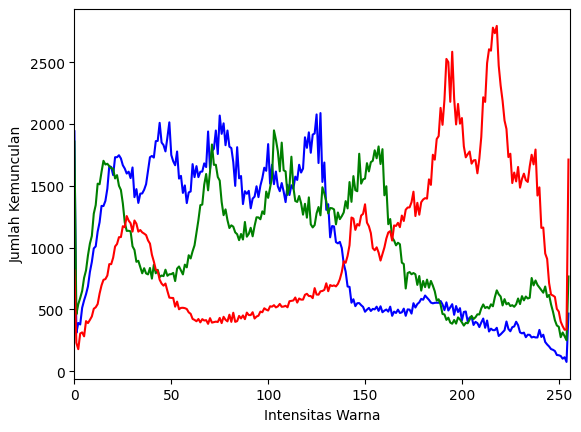

In [20]:
colors = ("b", "g", "r")
channel = (0, 1, 2)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel, c in zip(channel, colors):
  histogram, bin_edges = np.histogram(
      img1[:, :, channel], bins = 256, range = (0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


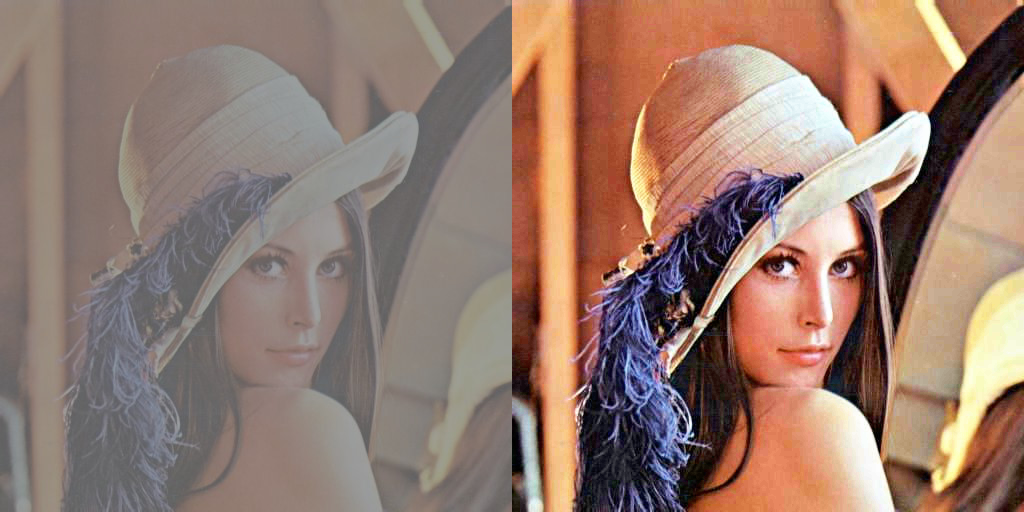

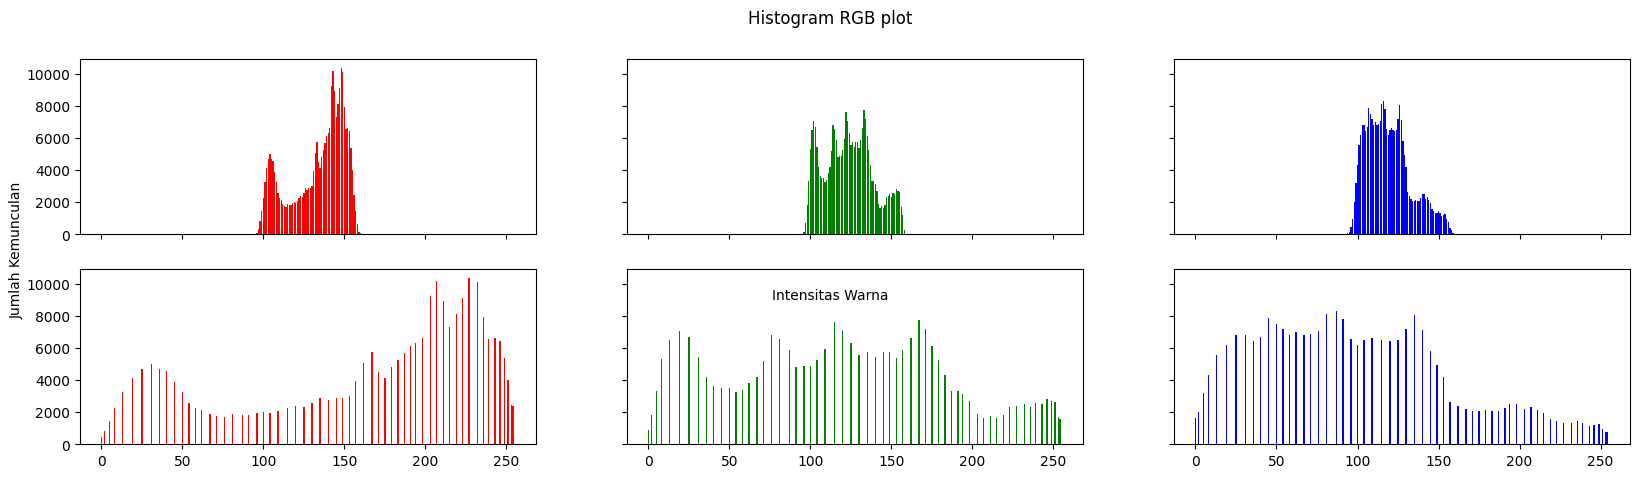

In [21]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')
def histog(img):
  height, width, channel = np.shape(img)
  ax = np.zeros((3, 256))
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

real_histo = histog(img2)

#convert to array
img_array = np.asarray(img2)

#normalisasi kamulatif histogram
hist_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(hist_array)
hist_array = hist_array/num_pixels

chist_array = np.cumsum(hist_array)

#pixel mapping
transform_map = np.floor(255*chist_array). astype(np.uint8)

#transformation
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img3 = eq_img_array

equal_histo = histog(img3)

final_frame = cv.hconcat((img2, img3))
cv2_imshow(final_frame)

name = np.arange(256)
grayimg = np.array_equal(B, G, R)
if not grayimg:
   fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
   fig.suptitle('Histogram RGB plot')
   fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
   fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
   axs[0,0].bar(name, real_histo[2], color='red')
   axs[0,1].bar(name, real_histo[1], color='green')
   axs[0,2].bar(name, real_histo[0], color='blue')
   axs[1,0].bar(name, equal_histo[2], color='red')
   axs[1,1].bar(name, equal_histo[1], color='green')
   axs[1,2].bar(name, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
  axs[0,0].bar(name, real_histo[2], color='gray')
  axs[0,1].bar(name, equal_histo[2], color='gray')



6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

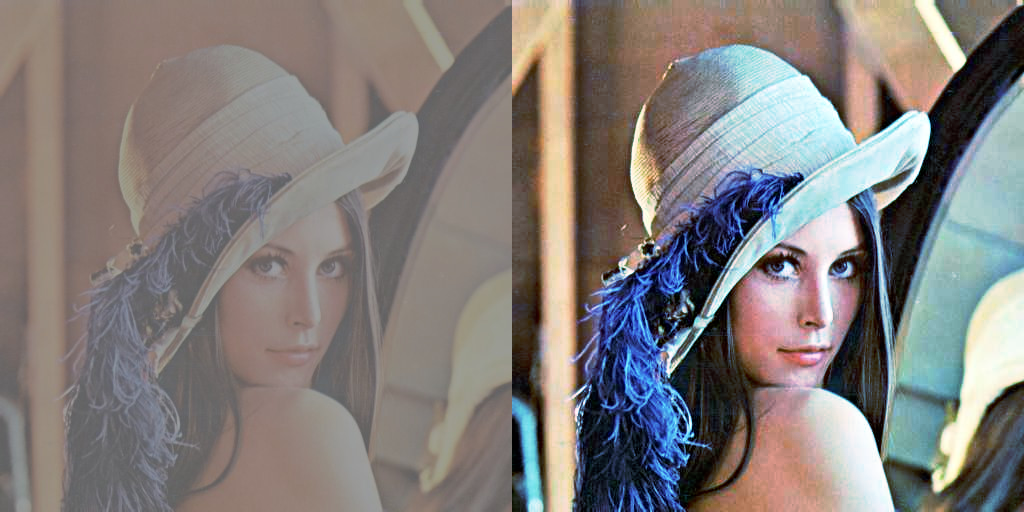

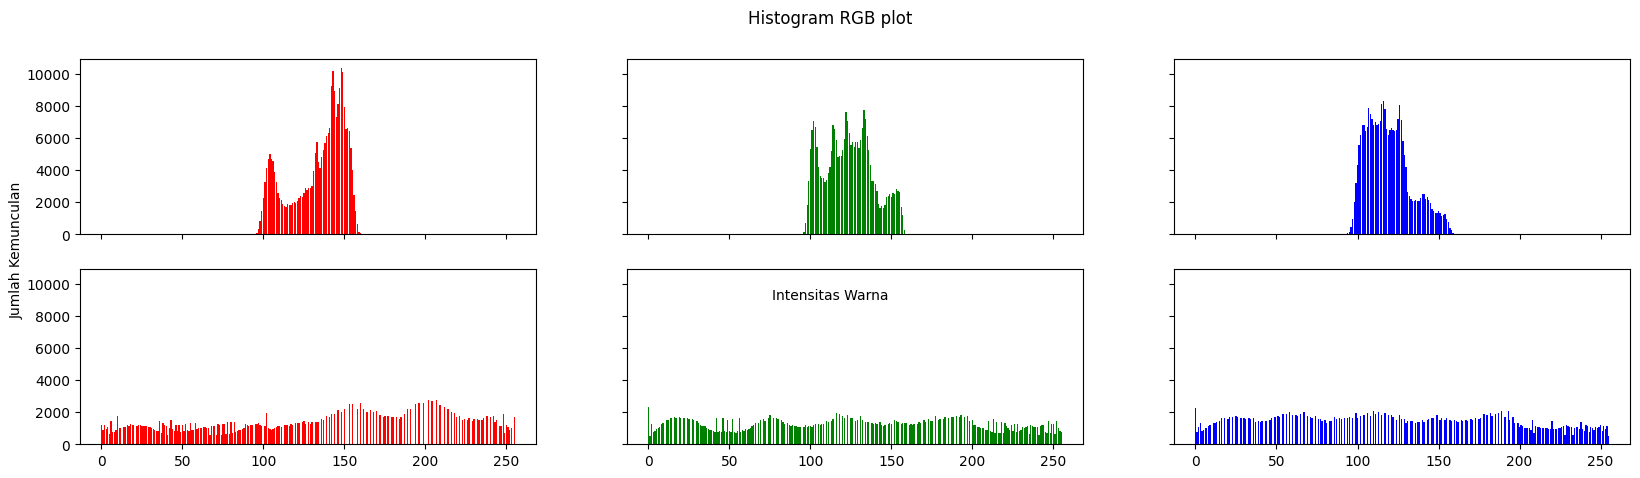

In [22]:
channel = cv.split(img1)
eq_channel = []
for ch, color in zip(channel, ["r", "g", "b"]):
  eq_channel.append(cv.equalizeHist(ch))
eq_img = cv.merge(eq_channel)

equal_histo = histog(eq_img)

final_frame = cv.hconcat((img2, eq_img))
cv2_imshow(final_frame)

name = np.arange(256)
grayimg = np.array_equal(B, G, R)
if not grayimg:
   fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
   fig.suptitle('Histogram RGB plot')
   fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
   fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
   axs[0,0].bar(name, real_histo[2], color='red')
   axs[0,1].bar(name, real_histo[1], color='green')
   axs[0,2].bar(name, real_histo[0], color='blue')
   axs[1,0].bar(name, equal_histo[2], color='red')
   axs[1,1].bar(name, equal_histo[1], color='green')
   axs[1,2].bar(name, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
  axs[0,0].bar(name, real_histo[2], color='gray')
  axs[0,1].bar(name, equal_histo[2], color='gray')


7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

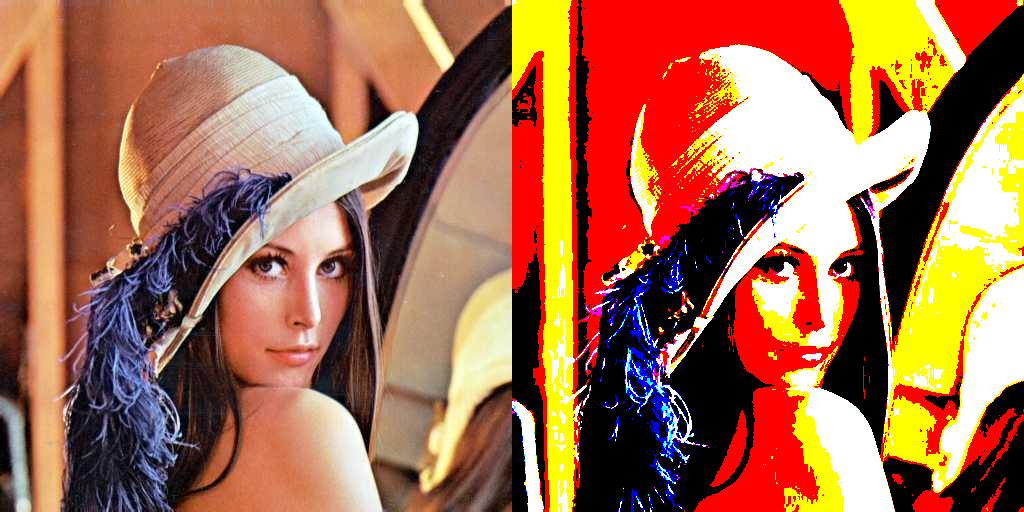

True

In [23]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

def warnaTerdekat(r, g, b):
  pvalue = 0
  minDistance =  255*255 + 255*255 + 255*255 + 1
  palleteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0],
   [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(palleteColor)):
    rDiff = r - palleteColor[i][0]
    gDiff = g - palleteColor[i][1]
    bDiff = b - palleteColor[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if(distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

palleteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

height, width, channel = img_16.shape
for y in range(0, height):
  for x in range(0, width):
    new = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = palleteColor[new]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/img/lena2.jpg', img_8)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

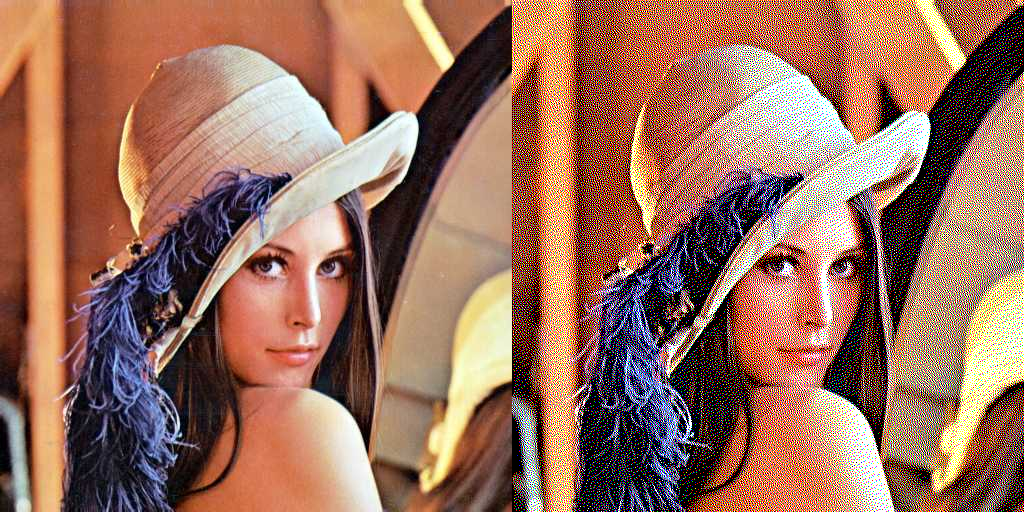

In [24]:
img6 = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

#convert to float
imgFloat = np.float64(img6)

height, width, channels = img6.shape
for y in range(height):
  for x in range(width):
    for c in range(channels):
      oldVal = imgFloat[y, x, c]
      newVal = round(oldVal/255) * 255
      imgFloat[y, x, c] = newVal

      error = oldVal - newVal

      if x < width -1:
        imgFloat[y, x + 1, c] += error * 7/16
      if y < height - 1:
        if x > 0:
          imgFloat[y+1, x-1, c] += error * 3/16
        imgFloat[y+1, x, c] += error * 5/16
        if x < width-1:
          imgFloat[y + 1, x + 1, c] += error * 1/16

finalImg = np.uint8(imgFloat)

final_frame = cv.hconcat((img6, finalImg))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


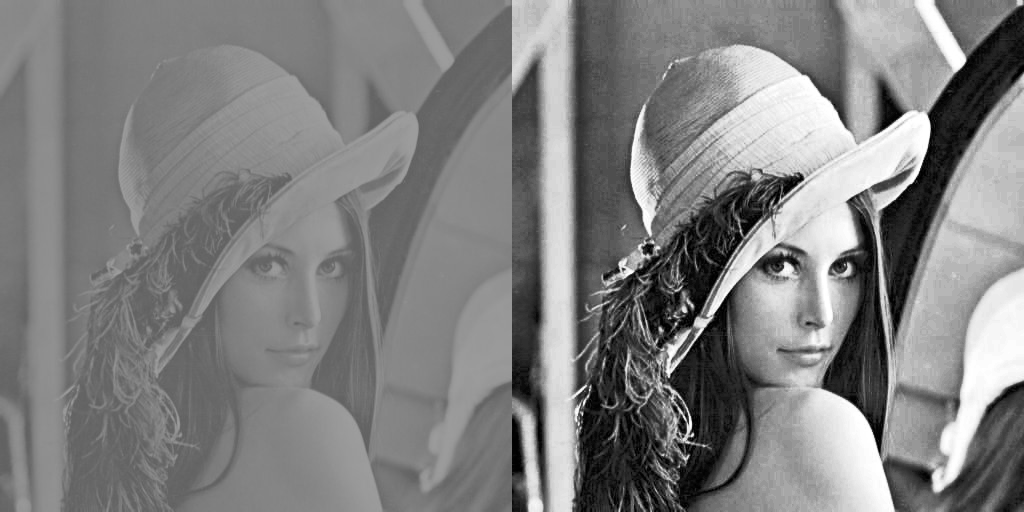

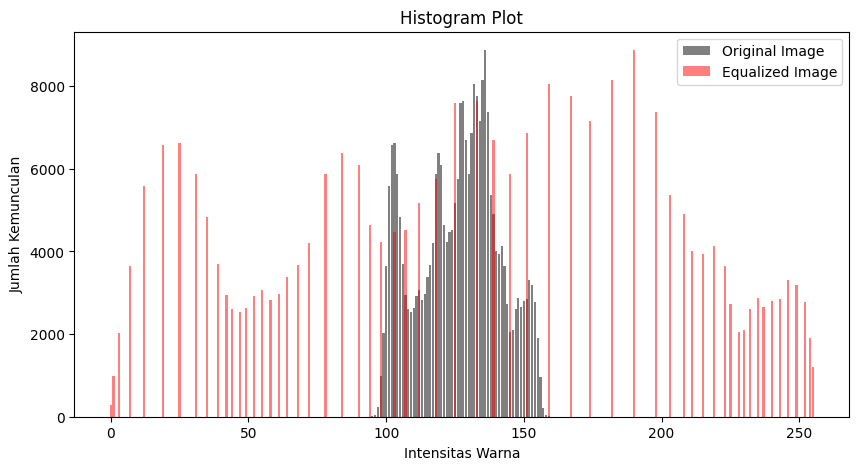

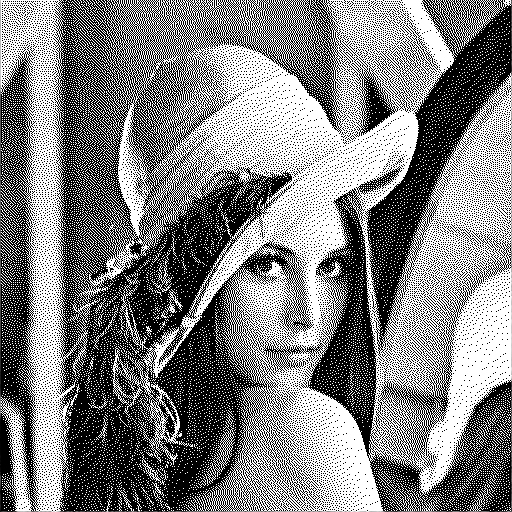

In [25]:
img7 = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')

grayImg = cv.cvtColor(img7, cv.COLOR_BGR2GRAY)
ori = cv.cvtColor(img7, cv.COLOR_BGR2RGB)

imgEqualized = cv.equalizeHist(grayImg)

#show image
concat_frame = cv.hconcat([grayImg, imgEqualized])
cv2_imshow(concat_frame)

#implementasi floyd-steinberg dithering
height, width = imgEqualized.shape[0], imgEqualized.shape[1]
imgDithered = np.copy(imgEqualized)

def threshold(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else: return val

def floyd_steinberg(img):
  height, width = img.shape[0], img.shape[1]
  for y in range(height - 1):
    for x in range(1, width-1):
      oldPixel = img[y, x]
      newPixel =  255 if oldPixel > 127 else 0
      img[y, x] = newPixel
      error = oldPixel - newPixel
      img[y, x+1] = threshold(img[y, x+1] + error * 7/16)
      img[y+1, x-1] = threshold(img[y+1, x-1] + error * 3/16)
      img[y+1, x] = threshold(img[y+1, x] + error * 5/16)
      img[y+1, x+1] = threshold(img[y+1, x+1] + error * 1/16)
  return img

imgDithered = floyd_steinberg(imgEqualized.copy())

hist_np, bins_np = np.histogram(grayImg.flatten(), bins=256, range=[0,256])
hist_eq, bins_eq = np.histogram(imgEqualized.flatten(), bins=256, range=[0,256])

names = np.arange(256)
plt.figure(figsize=(10,5))
plt.title('Histogram Plot')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(names, hist_np, color='gray', label='Original Image')
plt.bar(names, hist_eq, color='red', alpha=0.5, label='Equalized Image')
plt.legend()
plt.show()

cv2_imshow(imgDithered)